In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/age_gender.csv')

## Converting pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

data.head()

,age,gender,img_name,pixels
0,1,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [ ]:
print('Total rows: {}'.format(len(data)))
print('Total columns: {}'.format(len(data.columns)))

Total rows: 23705
Total columns: 4


In [ ]:
X = np.array(data['pixels'].tolist())
print(X.shape)

## Converting pixels from 1D to 3D
X = X.reshape(X.shape[0],48,48,1)
print(X.shape)

(23705, 2304)
(23705, 48, 48, 1)


### **Gender**

In [ ]:
yG = data['gender']

X_train, X_test, y_trainG, y_testG = train_test_split(
    X, yG, test_size=0.22, random_state=37
)

# print(X_train[0].shape)

In [ ]:
modelG = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5)
    L.Dense(32, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='sigmoid')
])

sgd = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)

modelG.compile(optimizer=sgd,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


## Stop training when validation loss reach 0.2700
class myCallbackG(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.2700):
            print("\nReached 0.2700 val_loss so cancelling training!")
            self.model.stop_training = True
        
callbackG = myCallbackG()

modelG.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [ ]:
history = modelG.fit(
    X_train, y_trainG, epochs=20, validation_split=0.1, batch_size=64, callbacks=[callbackG]
)

Epoch 1/20
260/260 [==============================] - 48s 184ms/step - loss: 0.9599 - accuracy: 0.6111 - val_loss: 0.5365 - val_accuracy: 0.7280
Epoch 2/20
260/260 [==============================] - 48s 185ms/step - loss: 0.5324 - accuracy: 0.7297 - val_loss: 0.4798 - val_accuracy: 0.7842
Epoch 3/20
260/260 [==============================] - 51s 195ms/step - loss: 0.4811 - accuracy: 0.7731 - val_loss: 0.4216 - val_accuracy: 0.8123
Epoch 4/20
260/260 [==============================] - 46s 175ms/step - loss: 0.4419 - accuracy: 0.7983 - val_loss: 0.3914 - val_accuracy: 0.8210
Epoch 5/20
260/260 [==============================] - 48s 185ms/step - loss: 0.4131 - accuracy: 0.8126 - val_loss: 0.3699 - val_accuracy: 0.8367
Epoch 6/20
260/260 [==============================] - 48s 183ms/step - loss: 0.3960 - accuracy: 0.8254 - val_loss: 0.3535 - val_accuracy: 0.8437
Epoch 7/20
260/260 [==============================] - 48s 183ms/step - loss: 0.3789 - accuracy: 0.8296 - val_loss: 0.3525 - val_ac

In [ ]:
loss, acc = modelG.evaluate(X_test,y_testG,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.2955489754676819
Test Accuracy: 0.8680981397628784


In [ ]:
# modelG.save('Model_gender.h5')

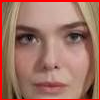

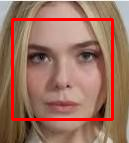

1/1 [==============================] - 0s 21ms/step
Female


In [ ]:
from google.colab.patches import cv2_imshow

img = Image.open('/content/girl.jpg')
img = img.save("img.jpg")

img = cv2.imread('img.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
	cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
	faces = img[y:y + h, x:x + w]
	cv2_imshow(faces)
	cv2.imwrite('face.jpg', faces)

cv2.imwrite('detcted.jpg', img)
cv2_imshow(img)
cv2.waitKey()

img = Image.fromarray(faces)
img = img.resize((48,48),Image.ANTIALIAS)
img = np.float32(img)
(R, G, B) = cv2.split(img)
G = G.reshape(-1, 48, 48, 1)

result = modelG.predict(G)

# print(result)
if(result[0][0]>=0.7) :
  result = "Female"
else :
  result = "Male"
print(result)

### **Age**

In [ ]:
yA = data['age']

X_train, X_test, y_trainA, y_testA = train_test_split(
    X, yA, test_size=0.22, random_state=37
)

In [ ]:
modelA = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(128, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Dropout(rate=0.5),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='relu')
])

sgd = tf.keras.optimizers.SGD(momentum=0.9)

modelA.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


## Stop training when validation loss reach 110
class myCallbackA(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<120):
            print("\nReached 110 val_loss so cancelling training!")
            self.model.stop_training = True
        
callbackA = myCallbackA()


modelA.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 128)       

In [ ]:
history = modelA.fit(
    X_train, y_trainA, epochs=30, validation_split=0.1, batch_size=64, callbacks=[callbackA]
)

Epoch 1/30
260/260 [==============================] - 59s 225ms/step - loss: 440.9383 - mae: 15.9976 - val_loss: 233.4378 - val_mae: 11.3331
Epoch 2/30
260/260 [==============================] - 59s 227ms/step - loss: 280.2608 - mae: 12.5972 - val_loss: 215.6223 - val_mae: 10.5019
Epoch 3/30
260/260 [==============================] - 59s 225ms/step - loss: 252.6405 - mae: 11.9059 - val_loss: 189.7020 - val_mae: 9.8146
Epoch 4/30
260/260 [==============================] - 59s 226ms/step - loss: 232.3331 - mae: 11.3109 - val_loss: 162.5276 - val_mae: 9.2307
Epoch 5/30
260/260 [==============================] - 58s 224ms/step - loss: 207.7952 - mae: 10.7015 - val_loss: 139.0167 - val_mae: 8.5911
Epoch 6/30
260/260 [==============================] - 58s 224ms/step - loss: 199.0428 - mae: 10.4771 - val_loss: 142.6054 - val_mae: 8.6905
Epoch 7/30
260/260 [==============================] - 58s 223ms/step - loss: 191.4436 - mae: 10.2073 - val_loss: 137.9171 - val_mae: 8.5205
Epoch 8/30
260/260

In [ ]:
mse, mae = modelA.evaluate(X_test,y_testA,verbose=0)
print('Test Mean squared error: {}'.format(mse))
print('Test Mean absolute error: {}'.format(mae))

Test Mean squared error: 117.02444458007812
Test Mean absolute error: 7.9489288330078125


In [ ]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [ ]:
modelA.save('Model_Age.h5')

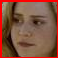

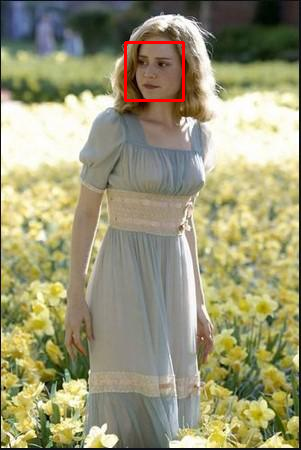

1/1 [==============================] - 0s 30ms/step
[[20.883753]]


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = Image.open('/content/girl3.jpg')
img = img.save("img.jpg")

img = cv2.imread('img.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
	cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
	faces = img[y:y + h, x:x + w]
	cv2_imshow(faces)
	cv2.imwrite('face.jpg', faces)

cv2.imwrite('detcted.jpg', img)
cv2_imshow(img)
cv2.waitKey()

img = Image.fromarray(faces)
img = img.resize((48,48),Image.ANTIALIAS)
img = np.float32(img)
(R, G, B) = cv2.split(img)
G = G.reshape(-1, 48, 48, 1)

result = modelA.predict(G)

print(result)
